Tenemos 40 carpetas (s1, s2, ..., s40) con 10 imágenes (1.png, 2.png, ..., 10.png) cada una. Las imágenes son de 112 x 92 en escala de grises normalizado (0-1).

In [109]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
from random import randint

Podemos ver algunos ejemplos

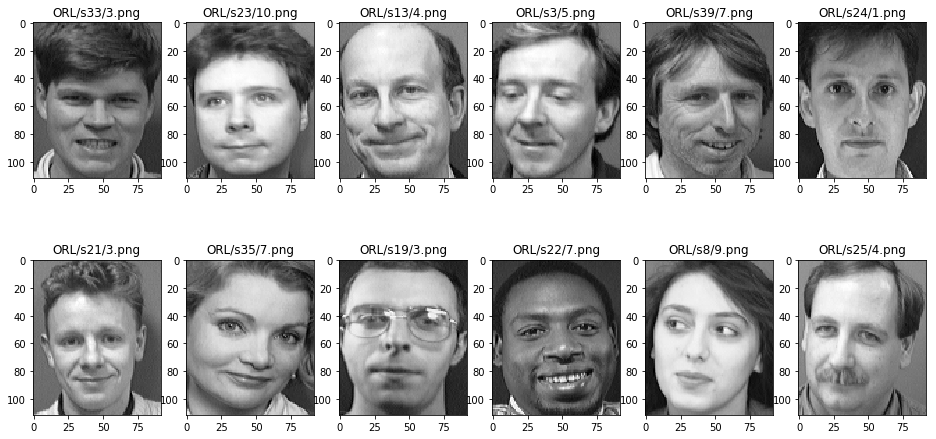

In [110]:
fig = plt.figure(figsize=(16,8))
c, r = 6, 2
for i in range(1, c*r +1):
    fig.add_subplot(r,c,i)
    path = "ORL/s"+str(randint(1, 40))+"/"+str(randint(1, 10))+".png"
    image = plt.imread(path)
    plt.imshow(image, cmap='gray')
    plt.title(path)
plt.show()

Leemos las imágenes de entrenamiento (1-5 de cada carpeta) y test (6-10 de cada carpeta).

In [111]:
samples = 40*5 # n = 200
size= 112*92 # d = 10304
x_train, y_train = np.zeros((size, samples)), np.zeros(samples)
x_test, y_test = np.zeros((size, samples)), np.zeros(samples)

In [112]:
for i in range(0,40):
    folder = "ORL/s"+str(i+1)
    for j in range(0,5):
        path = folder + "/"+str(j+1)+".png"
        image = plt.imread(path)
        x_train[:,i*5+j] = np.asarray(image).reshape(size)
        y_train[i*5+j] = i+1
        path = folder + "/"+str(j+6)+".png"
        image = plt.imread(path)
        x_test[:,i*5+j] = np.asarray(image).reshape(size)
        y_test[i*5+j] = i+1

Calculamos la cara media con las imágenes de entrenamiento.

In [113]:
mu = x_train.mean(axis=1).reshape((size,1))
meanFace = mu.reshape((112,92))

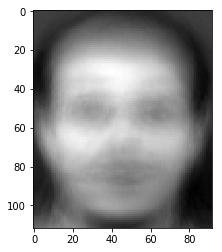

In [114]:
fig, ax = plt.subplots()
im = ax.imshow(meanFace, cmap='gray')
plt.show()

Matriz A

In [115]:
A = x_train - mu
A.shape # d x n

(10304, 200)

Matriz de covariancia

In [116]:
#C = np.dot(A,A.T)/samples # d x d -> muy costoso
Cp = np.matmul(A.T,A)/size # n x n -> asequible

In [117]:
Cp.shape # n x n

(200, 200)

Calculamos vectores y valores propios.

In [118]:
Lp, Bp = LA.eig(Cp)

In [119]:
B = np.matmul(A,Bp)
L = (size/samples)*Lp
B.shape

(10304, 200)

Normalizar eigenvectors

In [120]:
B_norm = B/LA.norm(B,axis=0)
LA.norm(B_norm,axis=0).sum()/samples # 1

0.99999999999999967

Podemos ver cada eigenvector como una cara -> eigenfaces

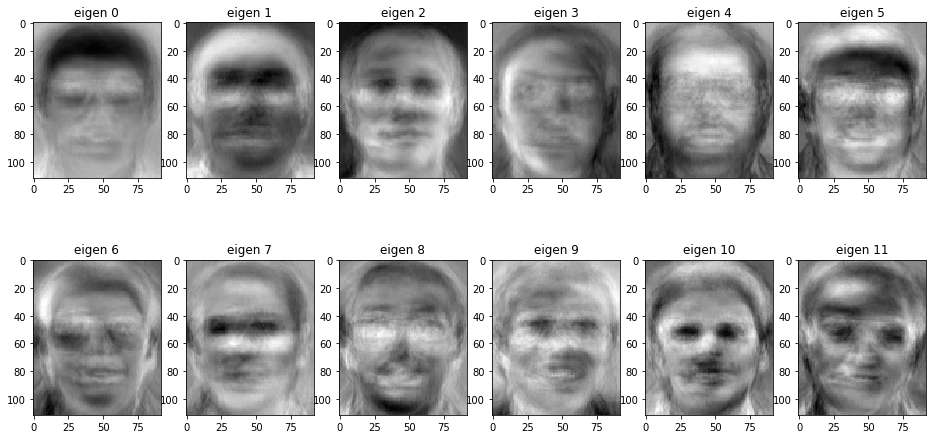

In [121]:
fig = plt.figure(figsize=(16,8))
c, r = 6, 2
for i in range(1, c*r +1):
    fig.add_subplot(r,c,i)
    plt.imshow(B_norm[:,i-1].reshape((112,92)), cmap='gray')
    plt.title("eigen "+str(i-1))
plt.show()

Nuevo espacio de representación (d x n) -> (dp x n) usando los dp eigenvectores mayores.

In [122]:
dp = 100
Bd = B_norm[:,:dp]
Bd.shape

(10304, 100)

In [123]:
x_train_PCA = np.matmul(Bd.T,x_train - mu)
x_test_PCA = np.matmul(Bd.T,x_test - mu)
x_train_PCA.shape

(100, 200)

Clasificamos con vecinos más cercanos

In [124]:
from sklearn.neighbors import KNeighborsClassifier

In [125]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(x_train_PCA.T, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(x_train_PCA.T, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(x_test_PCA.T, y_test)))

Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 0.89


In [126]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = knn.predict(x_test_PCA.T)
#print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

        1.0       0.83      1.00      0.91         5
        2.0       0.71      1.00      0.83         5
        3.0       1.00      1.00      1.00         5
        4.0       1.00      1.00      1.00         5
        5.0       0.80      0.80      0.80         5
        6.0       1.00      1.00      1.00         5
        7.0       1.00      1.00      1.00         5
        8.0       1.00      1.00      1.00         5
        9.0       1.00      1.00      1.00         5
       10.0       1.00      0.80      0.89         5
       11.0       1.00      0.80      0.89         5
       12.0       1.00      1.00      1.00         5
       13.0       1.00      1.00      1.00         5
       14.0       1.00      0.80      0.89         5
       15.0       0.71      1.00      0.83         5
       16.0       1.00      0.80      0.89         5
       17.0       0.33      0.40      0.36         5
       18.0       1.00      1.00      1.00   